In [1]:
# Usual imports
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # matrix handling

import os

In [45]:
# To do animations
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
! gfortran rg.f90 -Wall -llapack -frecursive -ffpe-summary='none'

In [75]:
def plotgs(N,nit,nlambdas):
    lambdas = np.linspace(0,3,nlambdas)
    
    # Name of the folder is pretty standard
    folder = 'N'+str(N)+'nit'+str(nit)
    
    # Execute program for every lam in lambdas
    for lam in lambdas:
        filename = str(round(lam,3))
        ! echo $N $nit $lam $folder $filename | ./a.out >/dev/null
    
    y = []
    for i in range(len(lambdas)):
        filename = str(round(lambdas[i],3))+'.csv'
        gs_en = np.genfromtxt('./data/'+folder+'/'+filename)[-1]
        y.append(gs_en)
        
    plt.plot(lambdas,y,color='crimson',label='Starting N: '+str(N))
    
def plotgs_convergence(frame_num):
    # You already need the data, you can do that by running plotgs with the same parameters
    x = np.linspace(0,3,nlambdas)    
    y = []
    for i in range(len(x)):
        filename = str(round(x[i],3))+'.csv'
        gs_en = np.genfromtxt('./data/'+folder+'/'+filename)[frame_num]
        y.append(gs_en)
    line.set_data((x,y))
    line.set_color('crimson')
    
    return line,

def plt_ev_MFA(nlam):
    x = np.linspace(0,3,nlam)
    
    plt.yticks(rotation=90)
    plt.grid(True)
    
    xx = 0
    y = []
    y1 = []
    y2 = []
    while(x[xx]<=2):
        y.append( -1 - (x[xx]**2)/4 )
        y1.append( -1 - (x[xx]**2)/4 )
        y2.append( -x[xx] )
        xx = xx + 1
    while(xx < nlam):
        y.append( -x[xx] )
        y1.append( -1 - (x[xx]**2)/4 )
        y2.append( -x[xx] )
        xx = xx + 1
    plt.plot(x,y,label='MFA',color='black')
    plt.plot(x,y1,ls='--',color='green',alpha=0.5)
    plt.plot(x,y2,ls='--',color='blue',alpha=0.5)
    plt.plot(2, -2, marker='+',color='crimson', ms=10,mew=2)
    
def plt_ev_static(frame_num):
    # You already need the data, you can do that by running plotgs with the same parameters
    x = np.linspace(0,3,nlambdas)
    for frame in range(nit):
        y = []
        for i in range(len(x)):
            filename = str(round(x[i],3))+'.csv'
            gs_en = np.genfromtxt('./data/'+folder+'/'+filename)[frame]
            y.append(gs_en)
        if(frame < fshow):
            plt.plot(x,y,color='crimson', alpha = .5 + float(frame)/(2*fshow) )

In [5]:
N = 4
nit = 60
nlambdas = 40
folder = 'N'+str(N)+'nit'+str(nit)

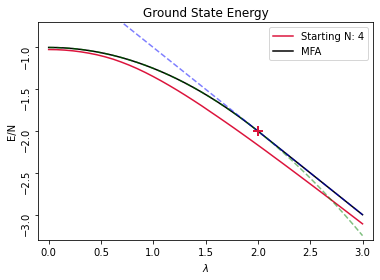

In [6]:
plotgs(N,nit,nlambdas)
plt_ev_MFA(nlambdas)
plt.xlim(-.1, 3.1)
plt.ylim(-3.3, -.7)
plt.title('Ground State Energy')
plt.xlabel(r'$\lambda$')
plt.yticks(rotation=90)
plt.ylabel('E/N')
plt.legend()
plt.grid(False)

plt.savefig('./imgs/RG_static.svg', format='svg')


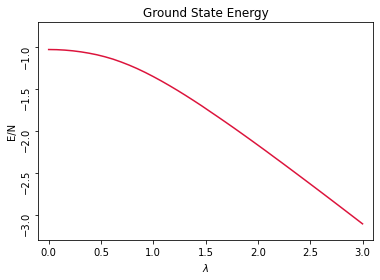

In [7]:
fig, ax = plt.subplots()
line, = ax.plot([])

ax.set_xlim(-.1, 3.1)
ax.set_ylim(-3.3, -.7)

plt.title('Ground State Energy')
plt.xlabel(r'$\lambda$')
plt.ylabel('E/N')
plt.yticks(rotation=90)

anim = animation.FuncAnimation(fig, plotgs_convergence, frames=20)
anim.save('./imgs/RG_anim.mp4', writer='ffmpeg', fps=20, dpi=256)


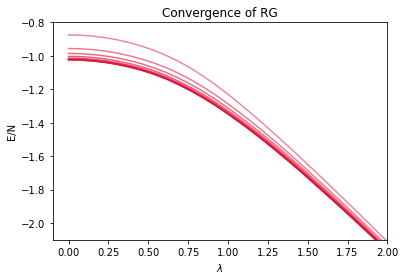

In [78]:

fshow = 8
plt_ev_static(nlambdas)
plt.xlim(-0.1,2)
plt.ylim(-2.1,-.8)
plt.title('Convergence of RG')
plt.xlabel(r'$\lambda$')
plt.ylabel('E/N')

plt.savefig('./imgs/RG_static_anim.svg', format='svg')